# **Principal Component Analysis (PCA)**

### Overview:
- Utilized a dataset with housing market data.
- Standardized key features and performed PCA, resulting in two principal components.
- Standardized the target variable 'price'.
- Split the dataset into training and testing sets.
- Trained four regression models: Linear Regression, Decision Tree, Random Forest, and K Neighbors.
- Evaluated models using RMSE and R-squared metrics.





In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tqdm.auto import tqdm

# Load the dataset
file_path = 'Housing.csv'
housing_df = pd.read_csv(file_path)

# Display the head of the dataframe
print(housing_df.head())

# Data Cleaning
# Remove rows based on specific conditions
conditions = [
    (housing_df['bedrooms'] == 33) & (housing_df['bathrooms'] == 1.75),
    (housing_df['bedrooms'] == 0) & (housing_df['price'] == 1095000),
    (housing_df['bedrooms'] == 0) & (housing_df['price'] == 380000),
    (housing_df['bedrooms'] == 33) & (housing_df['area'] == 1620),
    (housing_df['area'] > 1000000) & (housing_df['bathrooms'] == 1)
]
for condition in tqdm(conditions):
    housing_df = housing_df.drop(housing_df[condition].index)

# Split the data into train and test sets
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)

# Display the head of the train and test dataframe
print('Train set:')
print(train_df.head())
print('\nTest set:')
print(test_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


  0%|          | 0/5 [00:00<?, ?it/s]

Train set:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
46   7525000  6000         3          2        4      yes        no       no   
93   6300000  7200         3          2        1      yes        no      yes   
335  3920000  3816         2          1        1      yes        no      yes   
412  3430000  2610         3          1        2      yes        no      yes   
471  3010000  3750         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
46               no             yes        1       no        furnished  
93               no             yes        3       no   semi-furnished  
335              no             yes        2       no        furnished  
412              no              no        0      yes      unfurnished  
471              no              no        0       no      unfurnished  

Test set:
       price  area  bedrooms  bathrooms  stories mainroad g

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Separating out the features
x = train_df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_data = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Display the head of the transformed data
print(pca_data.head())

# Display the explained variance ratio
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)

   principal component 1  principal component 2
0               2.265548              -0.910812
1               1.681647               2.394360
2              -1.070060               1.422005
3              -0.835632              -1.221273
4              -0.650581              -0.921082
Explained variance ratio:
[0.38637826 0.23626657]


Sum of explained variance ratio: 0.6226448307081116


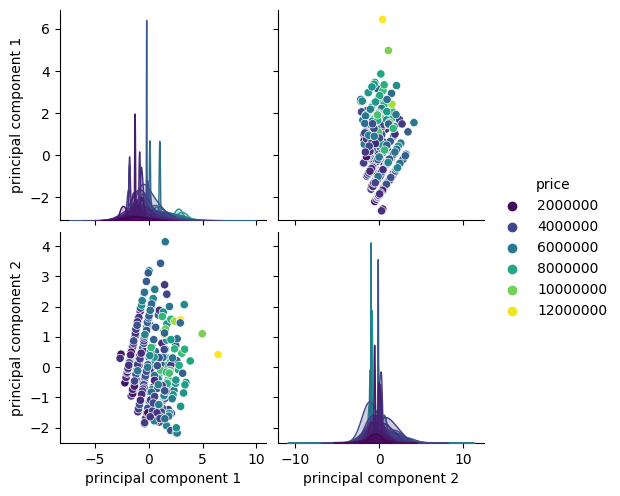

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sum of explained variance ratio
sum_explained_variance = np.sum(pca.explained_variance_ratio_)
print('Sum of explained variance ratio:', sum_explained_variance)

# Create a new dataframe with the principal components and target variable
# Note: Assuming 'price' is the target variable and is present in the train_df
pca_data['price'] = train_df['price'].values

# Plot pair plot
sns.pairplot(pca_data, vars=['principal component 1', 'principal component 2'], hue='price', palette='viridis')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Standardize the target variable 'price'
sc2 = StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(train_df[['price']].values.reshape(-1,1)))

# Display the standardized target variable
print(y_scaled[:5])

# Describe the PCA dataframe
pca_data_description = pca_data.describe()
print(pca_data_description)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y_scaled, test_size=0.2, random_state=42)

# Train different regression models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

# Compute the RMSE and R-squared for each model
rmse_scores = []
r2_scores = []
for model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Display the RMSE and R-squared scores
print('RMSE scores:', rmse_scores)
print('R-squared scores:', r2_scores)

[ 1.60509012  0.90746568 -0.44791897 -0.72696874 -0.96615427]
       principal component 1  principal component 2         price
count           4.360000e+02           4.360000e+02  4.360000e+02
mean           -8.148426e-18          -1.629685e-17  4.706527e+06
std             1.391522e+00           1.088140e+00  1.757976e+06
min            -2.637872e+00          -2.180059e+00  1.750000e+06
25%            -9.978706e-01          -8.170917e-01  3.498250e+06
50%            -2.054221e-01          -8.736768e-02  4.291000e+06
75%             9.383963e-01           5.645564e-01  5.600000e+06
max             6.445093e+00           4.141019e+00  1.225000e+07


  0%|          | 0/4 [00:00<?, ?it/s]

RMSE scores: [0.6832821938615689, 0.849948710263999, 0.7140879949832113, 0.7052178600308326]
R-squared scores: [0.5331125897667698, 0.2775673007688024, 0.490064296481857, 0.5026540775613058]


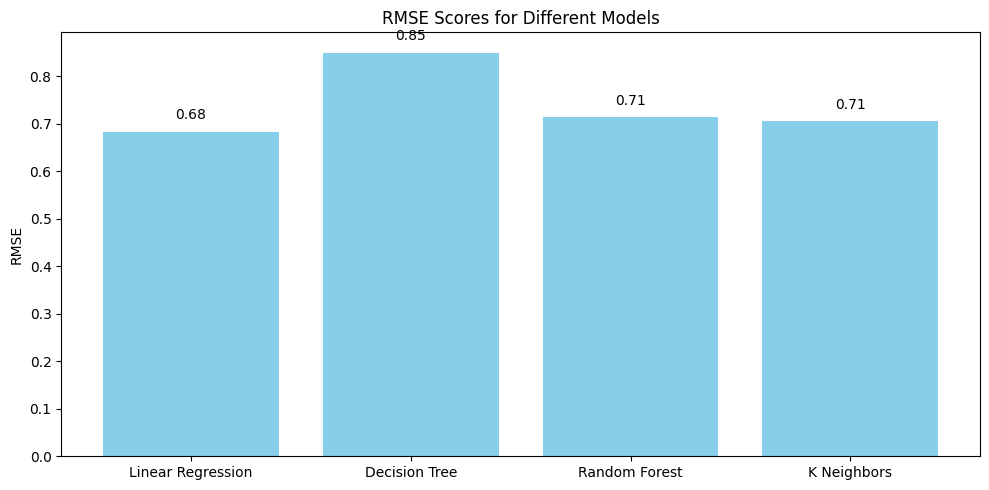

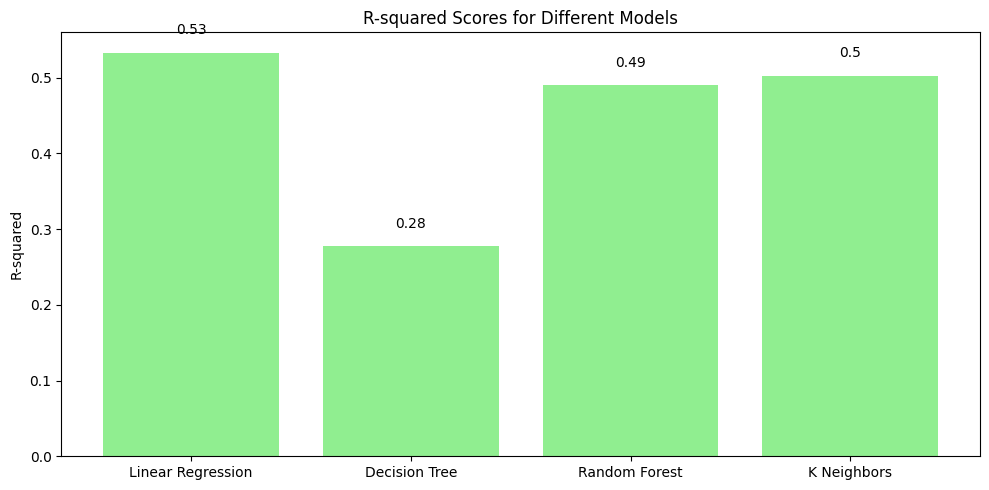

In [13]:
import matplotlib.pyplot as plt

# Model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'K Neighbors']

# Plotting RMSE scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title('RMSE Scores for Different Models')
plt.ylabel('RMSE')
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Plotting R-squared scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.title('R-squared Scores for Different Models')
plt.ylabel('R-squared')
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()


### Conclusion:
- Linear Regression model had the best performance with the lowest RMSE and highest R-squared score.
- Decision Tree model performed the worst with the highest RMSE and lowest R-squared score.
- Random Forest and K Neighbors models had similar and moderate performance metrics.

Linear Regression proved to be an effective model for predicting housing prices using principal components from the dataset. More complex models did not significantly improve prediction accuracy and might require further tuning or additional features to enhance their performance.

